# Куликов Матвей Дмитриевич

#                                    Лабораторная работа №5

## Массивы Numpy

**1.** Сформировать одномерный массив, состоящий из n вещественных элементов co значением от -10 до 10.0. Для случайного числа y, такого, что *минимальный элемент массива < y < максимальный элемент массива*, вычислить:  
  
* произведение элементов массива, значения модуля которых больше модуля y,  
  
* сумму модулей остальных элементов.

In [2]:
import numpy as np
import random

In [59]:
n = int(input("Введите n:"))
while n == 0:
    n = int(input("Введите не 0:"))

print(f"n = {n}")

array = np.random.uniform(-10, 10, n)
print(f"array = {array}")

min = np.min(array)
max = np.max(array)
print(f"min = {min}")
print(f"max = {max}")

if min == max:
    print("Не существует подходящего y (min == max)")
else:
    y = random.uniform(min, max)
    while not min < y < max:
        y = random.uniform(min, max)
    
    print(f"y = {y}")
    abs_array = np.abs(array)
    print(f"abs_array = {abs_array}")
    
    mul = 1
    sum = 0
    y_abs = abs(y)
    
    for i in range (0, n):
        if abs_array[i] > y_abs:
            mul *= abs_array[i]
        else:
            sum += abs_array[i]
            
    print(f"mul = {mul}")
    print(f"sum = {sum}")

n = 5
array = [-6.87654136 -0.20595401 -9.74792353 -4.28778203 -9.70680333]
min = -9.747923526800529
max = -0.20595401197844687
y = -4.323969459657649
abs_array = [6.87654136 0.20595401 9.74792353 4.28778203 9.70680333]
mul = 650.6664339538992
sum = 4.493736044461199


**2.** Найти максимальный элемент в одномерном массиве x среди элементов, перед которыми стоит нулевой.

In [133]:
array = np.array([0, -1, 0, -0.5, 0, 10, 0])
after_zeroes_indexes = np.where(array == 0)[0] + 1
after_zeroes = array[after_zeroes_indexes[np.where(after_zeroes_indexes < len(array))]]

if len(after_zeroes):
    print(np.max(after_zeroes))
else:
    print("Таких элементов нету!")

10.0


**3.** Дана целочисленная прямоугольная матрица. Определить: количество строк, не содержащих ни одного нулевого элемента, а также 
максимальное значение из чисел, встречающихся в заданной матрице более одного раза.

In [221]:
matrix = np.array([[4, 6, 8],
                   [2, 10, 1],
                   [0, 30, 6],
                   [0, 6, 10]])

if len(matrix.shape) < 2:
    print("Матрица должна быть прямоугольной")
else:
    print(len(np.where(np.count_nonzero(matrix, axis=1) == matrix.shape[1])[0]))
    uniques = np.unique(matrix, return_counts=True)
    multiple_occurred_values = uniques[0][np.where(uniques[1] > 1)]
    if len(multiple_occurred_values):
        print(np.max(uniques[0][np.where(uniques[1] > 1)]))
    else:
        print("Нету чисел, встречающихся в заданной матрице более одного раза.")

3
Нету чисел, встречающихся в заданной матрице более одного раза.


**4.** Элемент матрицы называется локальным минимумом, если он строго меньше всех имеющихся у него соседей. Соседями элемента А[i,j] в матрице назовем элементы А[k,l], где i-1<=k<=i+1, j-1 < l <j+1, (k, l) != (i, j).  
Подсчитать количество локальных минимумов заданной в файле input.txt матрицы размером 10 на 10.

In [80]:
import numpy as np


def in_range(start, value, finish):
    return start <= value < finish


def is_local_min(matrix, i, j):
    for ii in range(-1, 2):
        for jj in range(-1, 2):
            if not (i + ii == i and j + jj == j) and in_range(0, i + ii, len(matrix)) and in_range(0, j + jj, len(matrix[i + ii])) and matrix[i + ii][j + jj] <= matrix[i][j]:
                return False
    return True


f = open("task_4/input.txt", "r")
text_matrix = f.read().strip()
f.close()

matrix = np.array(np.mat(text_matrix))
count = 0

for i in range(0, len(matrix)):
    for j in range(0, len(matrix[i])):
        if is_local_min(matrix, i, j):
            count += 1
            
print(count)

1


**5.** Определите, является ли массив магическим квадратом (суммы по всем горизонталям, вертикалям и двум диагоналям равны).

In [74]:
def is_magic_square(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        return False
        
    magic_sum = None
    main_diagonal_sum = 0
    sub_diagonal_sum = 0
    
    for i in range(0, len(matrix)):
        horizontal_sum = 0
        vertical_sum = 0
        
        for j in range(0, len(matrix[i])):
            if i == j:
                main_diagonal_sum += matrix[i][j]
            if i + j == len(matrix) - 1:
                sub_diagonal_sum += matrix[i][j]
            horizontal_sum += matrix[i][j]
            vertical_sum += matrix[j][i]
        
        if magic_sum is None:
            if horizontal_sum == vertical_sum:
                magic_sum = horizontal_sum
            else:
                print(horizontal_sum)
                print(vertical_sum)
                return False
        else:
            if not horizontal_sum == vertical_sum == magic_sum:
                print(horizontal_sum)
                print(vertical_sum)
                return False
    
    if main_diagonal_sum == sub_diagonal_sum == magic_sum:
        print(magic_sum)
        return True
    else:
        print(f"expression: main diagonal sum {main_diagonal_sum} = sub diagonal sum {sub_diagonal_sum} = magic sum {magic_sum} is not correct")
        return False
    

matrix = np.array([[4, 6, 8],
                   [6, 10, 2],
                   [8, 2, 8]])

# matrix = np.array([[5, 5, 5],
#                    [5, 5, 5],
#                    [5, 5, 5]])

print(is_magic_square(matrix))

expression: main diagonal sum 22 = sub diagonal sum 26 = magic sum 18 is not correct
False


**6.** Программным образом заполните массив одним из двух следующих способов. Размерность n и m, а также номер способа заполнения вводится пользователем при запуске программы.
Результат записать в файл.

**7.** Удалите строку и столбец, на пересечении которых находится минимальный элемент массива. После этого отсортируйте столбцы массива по неубыванию минимальных элементов в них.

In [245]:
matrix = np.array([[4, 6, 8],
                   [6, 3, 6],
                   [8, 5, 1]])

position = np.where(matrix == matrix.min())
[row] = position[0]
[col] = position[1]

matrix = np.delete(matrix, row, 0)
matrix = np.delete(matrix, col, 1)

min_col_elements = matrix.min(axis=0)
order = np.argsort(min_col_elements)
print(matrix[:, order])

[[6 4]
 [3 6]]


## Обработка исключений. Библиотека Matplotlib

**8.**	Реализовать проверку числа 35742549198872617291353508656626642567 на простоту последовательным перебором возможных делителей (не нужен эффективный алгоритм). Выполнить замер времени работы кода без обработки исключений и с ней. Можно проводить тестирование на числе 2147483647 или 11111111111111111111111.

In [274]:
import time


def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False
    return True


number = 2147483647

start_time = time.time()
result = is_prime(number)
end_time = time.time()
print(f"Простое: {result}")
print(f"Время выполнения без обработки исключений: {end_time - start_time} секунд")

start_time = time.time()

try:
    result = is_prime(number)
    print(f"Простое: {result}")
except Exception as e:
    print(f"Произошла ошибка: {e}")

end_time = time.time()

print(f"Время выполнения с обработкой исключений: {end_time - start_time} секунд")

Простое: True
Время выполнения без обработки исключений: 0.002001523971557617 секунд
Простое: True
Время выполнения с обработкой исключений: 0.0020029544830322266 секунд


**9.**	В каталоге texts сохранить не менее 10 произвольных текстов объемом не менее 500 слов.  Пользователь программным образом выбирает текст. Программа строит график частоты для 50 наиболее частотных слов текста. 

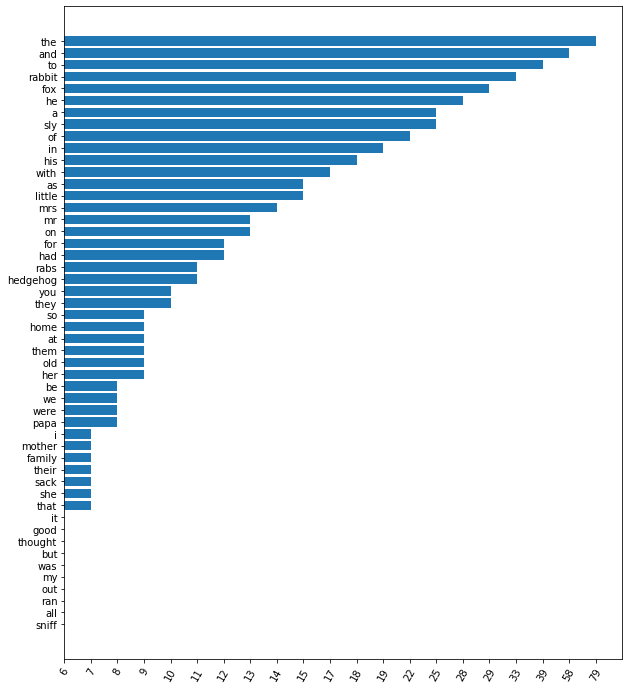

In [495]:
import matplotlib.pyplot as plt
import os
import re

texts = {}

def load_texts(directory):
    text_id = 1
    for name in os.listdir(directory):
        file_path = f"{directory}/{name}"
        if os.path.isfile(file_path):
            texts[str(text_id)] = (name.split('.')[0], file_path)
        text_id += 1

def histogram(s):
    d = dict()
    for c in s:
        if c not in d:d[c] = 1
        else:d[c] += 1
    return d

load_texts("texts")

texts_info = ""
for text_id in texts.keys():
    texts_info += text_id + ": " + texts[text_id][0] + "\n"

chosen_text_id = input("Введите номер текста который вы хотите проанализировать:\n" + texts_info)

file = open(texts[chosen_text_id][1], "r")
file_content = file.read()
file.close()

result = np.array(sorted(histogram(re.findall(r"\w+", file_content.casefold())).items(), key = lambda word_tuple: word_tuple[1], reverse=True)[:50])
if len(result):
    plt.figure(figsize=(10, 12))
    plt.xticks(rotation=60)
    plt.barh(list(reversed(result[:, 0])), list(reversed(result[:, 1])))
    plt.show()
else:
    print("Пустой файл!")

**10.**	Считать данные из текстового документа, в котором написано годовое количество осадков:

*Январь 15*

*Февраль 20*

…

*Декабрь 18*


Вывести их в форме диаграмм: обычная, горизонтальная, круговая (все виды диаграмм должны быть на одном рисунке). Сохранить получившийся рисунок в файл.


**11.** Нарисовать звёздочками зелёного цвета график кардиоиды в полярной системе координат. Добавьте легенду с заголовком «Функция» и подписью «Кардиоида» в левый верхний угол.
Угол принадлежит промежутку от 0 до 3π/2, r = 2,5. Уравнение кардиоиды: ρ = 2*r*(1 + cosφ).



**12.** Написать программу изображения графика функции y=√x. Не забывайте про то, что функция имеет значения ≥ 0. Предварительно программа запрашивает у пользователя следующую информацию:

* цвет графика (программа предлагает не менее пяти различных цветов);
* тип линии (программа предлагает не менее трех различных вариантов);
* толщину линии (программа предлагает не менее пяти различных вариантов).

Все запросы к пользователю обрабатываются с использованием обработки исключительных ситуаций. Варианты можно вводить строкой или числом (на ваш выбор).
